# 0. Install and Import Dependencies

In [1]:
# https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


# 1. Read in Data and Process Dates

In [3]:
df = pd.read_csv('data_predict(2).csv')
df

,ds,y
0,2018-01-01,28.074583
1,2018-01-02,27.785833
2,2018-01-03,29.041667
3,2018-01-04,27.576667
4,2018-01-05,27.656667
...,...,...
1456,2021-12-27,26.283333
1457,2021-12-28,26.989167
1458,2021-12-29,28.327917
1459,2021-12-30,27.247917


In [4]:
df['ds'] = pd.to_datetime(df['ds'])

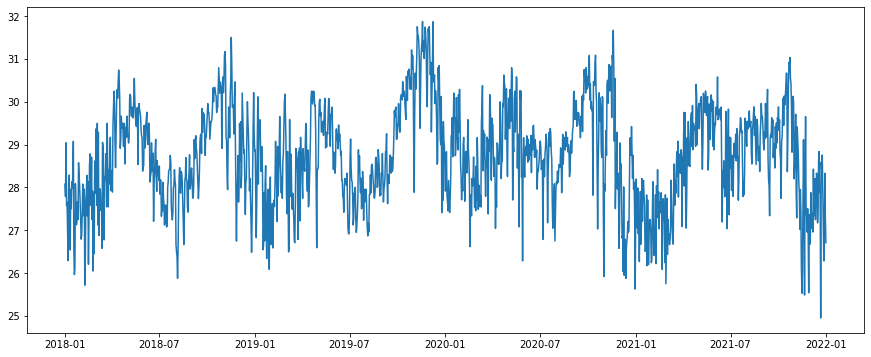

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(df['ds'], df['y'])
plt.show()

# 2. Train Model

In [6]:
m = NeuralProphet()

In [7]:
model = m.fit(df, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number for the learning rate finder (229). The results might not be optimal.


Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# 3. Forecast Away

In [8]:
future = m.make_future_dataframe(df, periods=900)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-01-01,None,26.825102,28.174067,-1.354358,0.005392
1,2022-01-02,None,26.765322,28.172314,-1.382963,-0.024028
2,2022-01-03,None,26.733479,28.170559,-1.411078,-0.026003
3,2022-01-04,None,26.739498,28.168806,-1.438643,0.009336
4,2022-01-05,None,26.707733,28.167051,-1.465597,0.006279


In [9]:
plot1 = m.plot(forecast)
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'f00c98a5-5356-43d9-9b6c-68787b042d20',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 2, 0, 0),
                          datetime.datetime(2022, 1, 3, 0, 0), ...,
                          datetime.datetime(2024, 6, 16, 0, 0),
                          datetime.datetime(2024, 6, 17, 0, 0),
                          datetime.datetime(2024, 6, 18, 0, 0)], dtype=object),
              'y': array([26.82510185, 26.76532173, 26.73347855, ..., 27.1167202 , 27.08653069,
                          27.09400177])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '1b3

In [10]:
plt2 = m.plot_components(forecast)
plt2

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'c922b68e-b606-4c09-813b-02df5e5ef3b3',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 2, 0, 0),
                          datetime.datetime(2022, 1, 3, 0, 0), ...,
                          datetime.datetime(2024, 6, 16, 0, 0),
                          datetime.datetime(2024, 6, 17, 0, 0),
                          datetime.datetime(2024, 6, 18, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([28.17406654, 28.17231369, 28.17055893, ..., 26.60094833, 26.59919357,
                          26.59744072]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality',
  

In [12]:
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error
import pandas as pd

# Split data into training and testing
data = pd.read_csv('data_predict(2).csv') 
train = data.iloc[:800] 
test = data.iloc[800:]

# Latih model NeuralProphet
m = NeuralProphet()
model = m.fit(train, freq='D')

# Buat prediksi pada data testing
future = m.make_future_dataframe(test, periods=len(test))
forecast = m.predict(future)

# Hitung MSE
y_true = test['y'].values
y_pred = forecast['yhat1'].values
mse = mean_squared_error(y_true, y_pred) 

# Cetak MSE
print('MSE:', mse)

# MSE semakin kecil menunjukkan semakin akurat

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.875% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 209
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (50) is too small than the required number for the learning rate finder (223). The results might not be optimal.


Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.849% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.849% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.849% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 50it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MSE: 3.588886876969455
